In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
hr_data=pd.read_csv('hr.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [7]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [8]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [9]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [10]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
X=pd.get_dummies(X, drop_first = True)

In [12]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=100,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [28]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=400)

In [29]:
clf.score(X_train,y_train)

0.9999166597216435

In [30]:
clf.score(X_test,y_test)

0.989

In [31]:
clf.oob_score_

0.9905825485457121

In [32]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

D:\ZAnaconda\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ZAnaconda\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


For n_estimators = 10
OOB score is 0.9827485623801984
************************
For n_estimators = 30
OOB score is 0.9891657638136512
************************
For n_estimators = 50
OOB score is 0.9899158263188599
************************
For n_estimators = 70
OOB score is 0.9901658471539295
************************
For n_estimators = 90
OOB score is 0.9906658888240687
************************
For n_estimators = 110
OOB score is 0.990415867988999
************************
For n_estimators = 130
OOB score is 0.9907492291024252
************************
For n_estimators = 150
OOB score is 0.9908325693807817
************************
For n_estimators = 170
OOB score is 0.9904992082673556
************************
For n_estimators = 190
OOB score is 0.9904992082673556
************************
For n_estimators = 210
OOB score is 0.990415867988999
************************
For n_estimators = 230
OOB score is 0.9905825485457121
************************
For n_estimators = 250
OOB score is 0.990582548

In [33]:
#Finalizing on a tree model with 150 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  n_jobs=-1, oob_score=True, random_state=400)

In [34]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [35]:
print (clf.estimators_[0])

DecisionTreeClassifier(random_state=1859118377)


In [36]:
print (clf.estimators_[0].feature_importances_)

[5.04619056e-01 1.33865181e-01 1.10075307e-01 7.10558635e-02
 1.57558554e-01 2.13045389e-03 3.25242845e-04 1.73390370e-05
 2.22373675e-03 7.40603480e-04 1.25108377e-03 1.50297786e-03
 1.21635485e-03 1.10851468e-03 2.74940619e-03 2.37646978e-03
 5.43524836e-03 1.74860789e-03]


In [37]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [38]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [39]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494752
last_evaluation          0.138632
time_spend_company       0.137539
number_project           0.110562
average_montly_hours     0.097978
salary_low               0.003442
dept_support             0.002896
dept_technical           0.002863
dept_sales               0.002594
salary_medium            0.002396
Work_accident            0.001533
dept_accounting          0.001499
dept_marketing           0.000722
dept_product_mng         0.000655
dept_RandD               0.000625
dept_hr                  0.000605
dept_management          0.000499
promotion_last_5years    0.000206
dtype: float64

<AxesSubplot:>

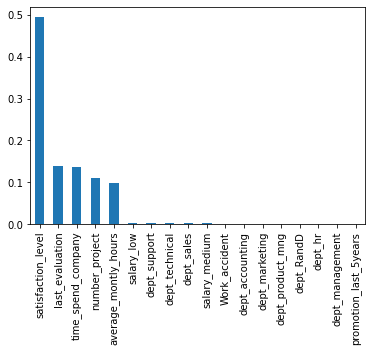

In [40]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=5)

In [44]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [45]:
clf.oob_score_

0.9911659304942079

In [46]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9834986248854071
************************
For n_estimators = 30
OOB score is 0.9899158263188599
************************
For n_estimators = 50
OOB score is 0.9905825485457121
************************
For n_estimators = 70
OOB score is 0.9909992499374948
************************
For n_estimators = 90
OOB score is 0.9912492707725644
************************
For n_estimators = 110
OOB score is 0.9914159513292774
************************
For n_estimators = 130
OOB score is 0.9918326527210601
************************
For n_estimators = 150
OOB score is 0.9915826318859905
************************
For n_estimators = 170
OOB score is 0.9915826318859905
************************
For n_estimators = 190
OOB score is 0.991665972164347
************************
For n_estimators = 210
OOB score is 0.9914159513292774
************************
For n_estimators = 230
OOB score is 0.9914159513292774
************************
For n_estimators = 250
OOB score is 0.99149929

In [47]:
#Finalize 190 trees
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [48]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [49]:
clf.oob_score_

0.991665972164347

In [50]:
clf.feature_importances_

array([0.3223274 , 0.12338392, 0.1805583 , 0.14885395, 0.18380018,
       0.00908194, 0.0018142 , 0.00154373, 0.00176472, 0.00149083,
       0.00184206, 0.00112564, 0.00110319, 0.00373451, 0.00274713,
       0.00370978, 0.00733434, 0.00378419])

In [51]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [52]:
imp_feat.sort_values(ascending=False)

satisfaction_level       0.322327
time_spend_company       0.183800
number_project           0.180558
average_montly_hours     0.148854
last_evaluation          0.123384
Work_accident            0.009082
salary_low               0.007334
salary_medium            0.003784
dept_sales               0.003735
dept_technical           0.003710
dept_support             0.002747
dept_management          0.001842
promotion_last_5years    0.001814
dept_accounting          0.001765
dept_RandD               0.001544
dept_hr                  0.001491
dept_marketing           0.001126
dept_product_mng         0.001103
dtype: float64

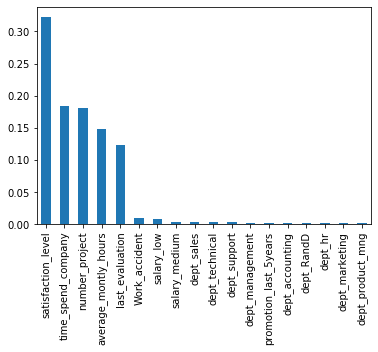

In [53]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [54]:
clf.score(X_train,y_train)

1.0

In [55]:
clf.score(X_test,y_test)

0.989